In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/../../2group_relationFinding.csv")

# Specify numeric columns of interest (exclude 'Version' since it's not numeric)
feature_columns = [
    'complexity_score', 'comments', 'multi', 'blank', 'h1', 'h2', 'N1', 'N2',
    'vocabulary', 'length', 'calculated_length', 'volume', 'difficulty',
    'effort', 'time', 'bugs', 'maintainability_index'
]
target_column = 'Risk_Group'

# Group by Risk_Group and Version, and calculate the mean for each feature
summary_df = df.groupby([target_column, 'Version'])[feature_columns].mean().reset_index()

# Save the summary to a new Excel file to examine the relationships
output_path = "/../../2group_relation.xlsx"
summary_df.to_excel(output_path, index=False)

print(f"Risk group relationship summary saved at: {output_path}")


Risk group relationship summary saved at: /../../2group_relation.xlsx


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/../../2group_training (1).csv'  # Replace with your file path
#df = pd.read_csv("/../../2group_relationFinding.csv")
df = pd.read_csv(file_path)

# 1. Count unique types
message_id_unique = df['message_id'].nunique()
risk_group_unique = df['Risk_Group'].nunique()
category_unique = df['category'].nunique()

print(f"Unique message_id: {message_id_unique}")
print(f"Unique Risk_Group: {risk_group_unique}")
print(f"Unique Categories: {category_unique}")

# 2. Relationship between message_id and Risk_Group
message_risk_group = df.groupby(['message_id', 'Risk_Group']).size().reset_index(name='Count')
print("\nMessage ID and Risk Group relationship:")
print(message_risk_group)

# 3. Relationship between message_id and Category
message_category = df.groupby(['message_id', 'category']).size().reset_index(name='Count')
print("\nMessage ID and Category relationship:")
print(message_category)

# 4. Distribution of Risk_Group across Categories
risk_group_category = df.groupby(['Risk_Group', 'category']).size().reset_index(name='Count')
print("\nRisk Group and Category distribution:")
print(risk_group_category)

# Optional: Save results to CSV
#message_risk_group.to_csv('message_risk_group_relationship.csv', index=False)
#message_category.to_csv('message_category_relationship.csv', index=False)
#risk_group_category.to_csv('risk_group_category_distribution.csv', index=False)


# Save the results directly in the specified Google Drive folder
drive_save_path = '/../../'
message_risk_group.to_csv(f'{drive_save_path}message_risk_group_relationship.csv', index=False)
message_category.to_csv(f'{drive_save_path}message_category_relationship.csv', index=False)
risk_group_category.to_csv(f'{drive_save_path}risk_group_category_distribution.csv', index=False)

print("Files saved successfully in:")
print(f"{drive_save_path}message_risk_group_relationship.csv")
print(f"{drive_save_path}message_category_relationship.csv")
print(f"{drive_save_path}risk_group_category_distribution.csv")



Unique message_id: 144
Unique Risk_Group: 2
Unique Categories: 5

Message ID and Risk Group relationship:
    message_id Risk_Group  Count
0        C0103        Low  61229
1        C0103     Severe  91423
2        C0105        Low   1000
3        C0113        Low    134
4        C0113     Severe     10
..         ...        ...    ...
240      W4901        Low     21
241      W4901     Severe    110
242      W4902     Severe    110
243      W4904        Low    150
244      W4905        Low    200

[245 rows x 3 columns]

Message ID and Category relationship:
    message_id    category   Count
0        C0103  convention  152652
1        C0105  convention    1000
2        C0113  convention     144
3        C0114  convention    7803
4        C0115  convention   23988
..         ...         ...     ...
139      W3101     warning    3368
140      W4901     warning     131
141      W4902     warning     110
142      W4904     warning     150
143      W4905     warning     200

[144 rows x 3 

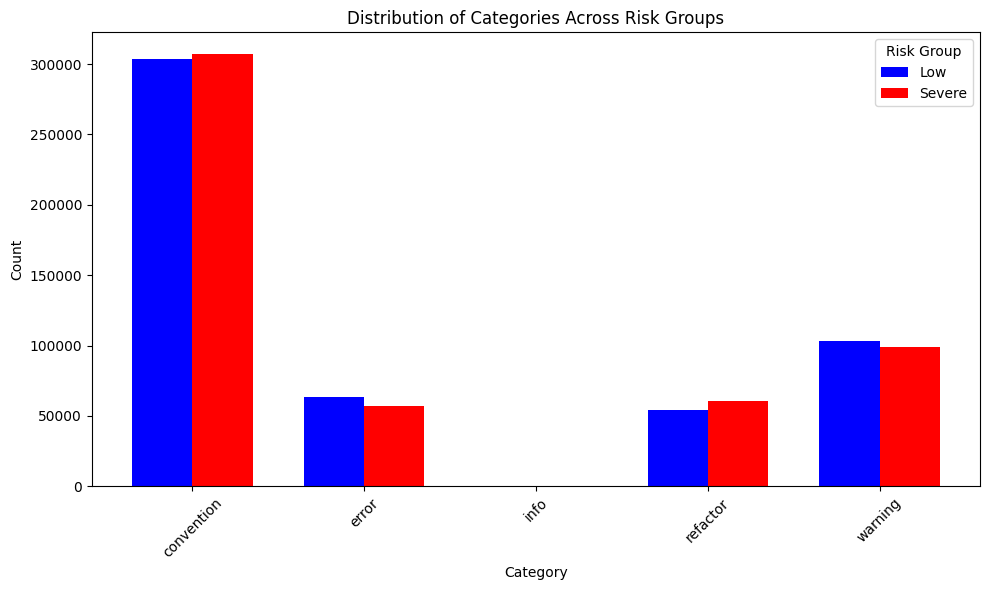

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data (replace this with the actual CSV reading step)
data = {
    "Risk_Group": ["Low", "Low", "Low", "Low", "Low", "Severe", "Severe", "Severe", "Severe"],
    "category": ["convention", "error", "info", "refactor", "warning",
                 "convention", "error", "refactor", "warning"],
    "Count": [303388, 63578, 198, 54343, 103442, 307181, 57362, 60375, 98708]
}
df = pd.DataFrame(data)

# Pivot the data to have categories as index and Risk_Group as columns
pivot_df = df.pivot(index="category", columns="Risk_Group", values="Count").fillna(0)

# Plotting
categories = pivot_df.index
x = range(len(categories))  # Positions for bars

plt.figure(figsize=(10, 6))

# Plot bars for each Risk_Group
bar_width = 0.35
plt.bar(x, pivot_df["Low"], width=bar_width, label="Low", color="blue", align="center")
plt.bar([p + bar_width for p in x], pivot_df["Severe"], width=bar_width, label="Severe", color="red", align="center")

# Add labels, title, and legend
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Categories Across Risk Groups")
plt.xticks([p + bar_width / 2 for p in x], categories, rotation=45)
plt.legend(title="Risk Group")
plt.tight_layout()

# Show the plot
plt.show()


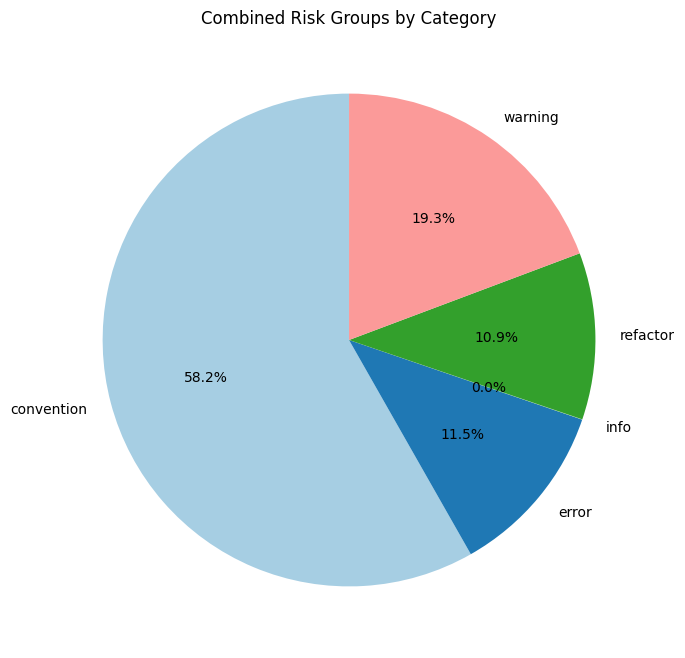

In [ ]:
# Combine the counts for each category
category_totals = df.groupby("category")["Count"].sum()

# Plot pie chart for combined Risk Groups
plt.figure(figsize=(8, 8))
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Combined Risk Groups by Category")
plt.show()


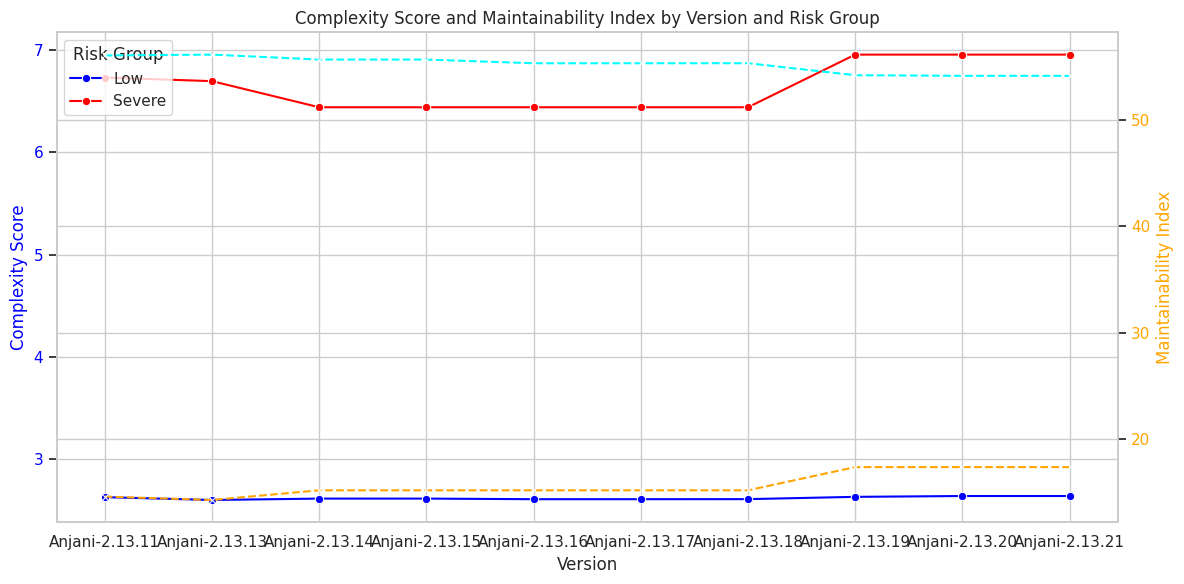

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data as a dictionary (replace this with loading from CSV if needed)
data = {
    'Risk_Group': ['Low'] * 10 + ['Severe'] * 10,
    'Version': [
        'Anjani-2.13.11', 'Anjani-2.13.13', 'Anjani-2.13.14', 'Anjani-2.13.15',
        'Anjani-2.13.16', 'Anjani-2.13.17', 'Anjani-2.13.18', 'Anjani-2.13.19',
        'Anjani-2.13.20', 'Anjani-2.13.21', 'Anjani-2.13.11', 'Anjani-2.13.13',
        'Anjani-2.13.14', 'Anjani-2.13.15', 'Anjani-2.13.16', 'Anjani-2.13.17',
        'Anjani-2.13.18', 'Anjani-2.13.19', 'Anjani-2.13.20', 'Anjani-2.13.21'
    ],
    'complexity_score': [
        2.628079117, 2.600467721, 2.614006116, 2.614006116, 2.608104844,
        2.608104844, 2.60871928, 2.631105322, 2.639177694, 2.639177694,
        6.72972973, 6.694736842, 6.439393939, 6.439393939, 6.439393939,
        6.439393939, 6.439393939, 6.95410628, 6.95410628, 6.95410628
    ],
    'maintainability_index': [
        56.09458279, 56.17567422, 55.70971966, 55.70971966, 55.36063333,
        55.36063333, 55.36502497, 54.23601143, 54.17919996, 54.17919996,
        14.57177032, 14.25069108, 15.16171324, 15.16171324, 15.16171324,
        15.16171324, 15.16171324, 17.34645412, 17.34645412, 17.34645412
    ]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Set plot style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot complexity_score for each Risk_Group
sns.lineplot(
    data=df, x='Version', y='complexity_score', hue='Risk_Group',
    marker='o', ax=ax1, palette={'Low': 'blue', 'Severe': 'red'}
)
ax1.set_ylabel('Complexity Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for maintainability_index
ax2 = ax1.twinx()
sns.lineplot(
    data=df, x='Version', y='maintainability_index', hue='Risk_Group',
    marker='x', linestyle='--', ax=ax2, palette={'Low': 'cyan', 'Severe': 'orange'},
    legend=False
)
ax2.set_ylabel('Maintainability Index', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set the x-axis label and title
ax1.set_xlabel('Version')
plt.title('Complexity Score and Maintainability Index by Version and Risk Group')

# Display the legend and the plot
ax1.legend(title='Risk Group', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
